In [2]:
# numpy implementation of a simple RNN
import numpy as np

timesteps=100
inputs_features=32
output_features=32

# input data
inputs=np.random.random((timesteps, inputs_features))
# initial state: all-zero vector
state_t=np.zeros((output_features,))

# random weight matrices
W=np.random.random((inputs_features, output_features))
U=np.random.random((output_features, output_features))
b=np.random.random((output_features,))

successive_outputs=[]
for input_t in inputs:
    output_t=np.tanh(np.dot(W, input_t)+np.dot(U, state_t)+b)
    successive_outputs.append(output_t)
    state_t=output_t

# the final output is a 2D tensor of shape (timesteps, output_features)
final_output_sequence=np.concatenate(successive_outputs, axis=0)
print(final_output_sequence)
print(final_output_sequence.shape)

[0.99999477 0.9999996  0.99999983 ... 1.         1.         1.        ]
(3200,)


In [4]:
# the Keras simple RNN
from keras.layers import SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=32

print('Loading data...')
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)
print(len(input_train),'train sequences')
print(len(input_test),'test sequences')

print('Pad sequences (samples x time)')
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape:',input_train.shape)
print('input_test shape:',input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
from keras.layers import Dense,Embedding
from keras.models import Sequential

model=Sequential()
# max_features means the number of possible tokens
# 32 means the dimensionality of the embedding
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6516 - acc: 0.6064 - val_loss: 0.5026 - val_acc: 0.7646
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4142 - acc: 0.8229 - val_loss: 0.3970 - val_acc: 0.8340
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2989 - acc: 0.8784 - val_loss: 0.3432 - val_acc: 0.8600
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2147 - acc: 0.9184 - val_loss: 0.3673 - val_acc: 0.8526
Epoch 5/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.1613 - acc: 0.9418 - val_loss: 0.3901 - val_acc: 0.8658
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1117 - acc: 0.9603 - val_loss: 0.4304 - val_acc: 0.8542
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0782 - acc: 0.9747 - val_loss: 0.5044 - val_acc:

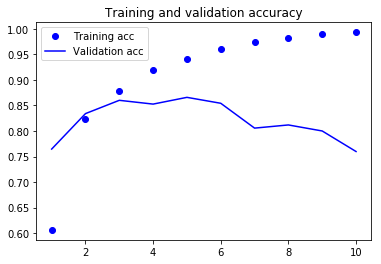

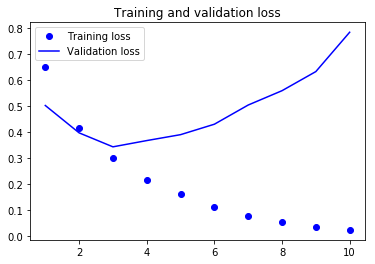

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
# use the LSTM layer in Keras
from keras.layers import LSTM

model=Sequential()
# max_features means the number of possible tokens
# 32 means the dimensionality of the embedding
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile('rmsprop','binary_crossentropy',['acc'])
history=model.fit(input_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.5092 - acc: 0.7630 - val_loss: 0.4351 - val_acc: 0.8202
Epoch 2/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.2956 - acc: 0.8854 - val_loss: 0.3359 - val_acc: 0.8524
Epoch 3/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2311 - acc: 0.9107 - val_loss: 0.3033 - val_acc: 0.8826
Epoch 4/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.2012 - acc: 0.9253 - val_loss: 0.3058 - val_acc: 0.8680
Epoch 5/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.1722 - acc: 0.9373 - val_loss: 0.3094 - val_acc: 0.8668
Epoch 6/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.1571 - acc: 0.9417 - val_loss: 0.3787 - val_acc: 0.8662
Epoch 7/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1416 - acc: 0.9488 - val_loss: 0.3392 - val_acc:

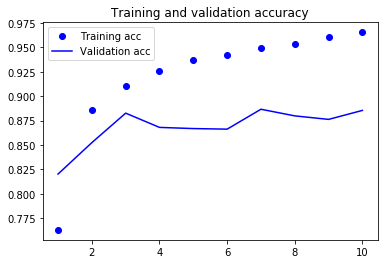

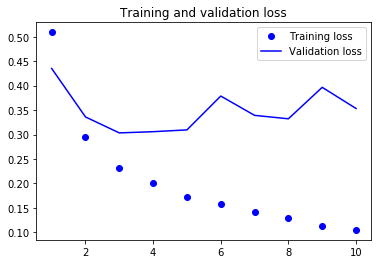

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()